In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [9]:
loan_data = pd.read_csv('./loan_data.csv')

In [10]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Check for nulls**

In [15]:
loan_data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

**Class Balance check**

In [13]:
loan_data['not.fully.paid'].value_counts(normalize=True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

*Highly imbalanced classes. When modeling we will need to look into some balancing techniques*

**Update data types from *int* to *boolean* for True/False columns**

In [14]:
loan_data['not.fully.paid'] = loan_data['not.fully.paid'].astype(bool)
loan_data['credit.policy'] = loan_data['credit.policy'].astype(bool)

**Correlation amongst the features**

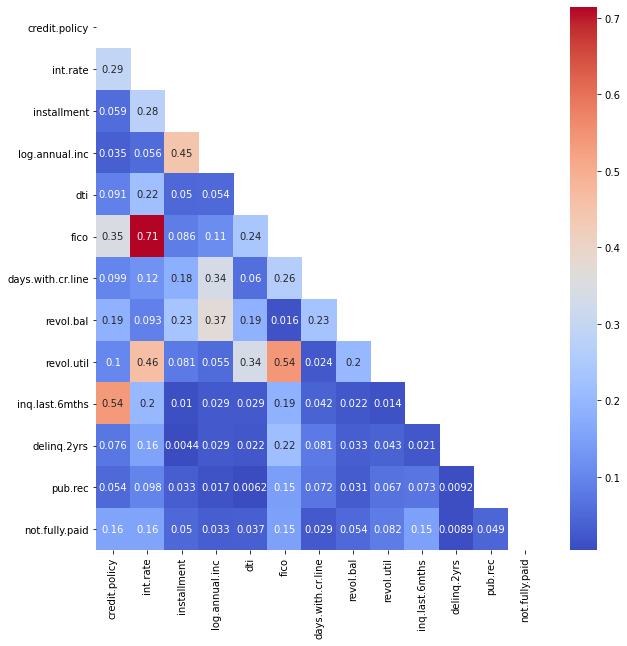

In [24]:
corr = loan_data.corr().abs()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize= (10,10))
sns.heatmap(data= corr,           
            cmap= 'coolwarm',      
            annot = True,
           mask=mask);

*Correlated features*
1. As expected, FICO score, Interest rate and Credit Utilization are correlated.
2. Credit policy and Inquiries in the last 6 months 
3. Installments and annual income.

Since we are looking at absolute values, we cannot differentiate between postive and negative correlations in this heatmap

**Define X and y**

In [ ]:
X = loan_data.drop(columns = 'not.fully.paid')
y = loan_data['not.fully.paid']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11, stratify = y)

**Scale**

In [ ]:
ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

**Fit and score and Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(Xs_train,y_train)

In [ ]:
lr.score(Xs_train,y_train) , lr.score(Xs_test,y_test)